In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# os.chdir('/capstor/scratch/cscs/ajayaraj/qtpyt-tests/gw_edmft/AuBDA14/')

In [2]:
dft_folder = "dft/device"
input_folder = "output/lowdin"
output_folder = "output/lowdin/ed"
os.makedirs(output_folder, exist_ok=True)

Efermi = np.loadtxt(f"{dft_folder}/fermi.txt")
H_eff = np.load(f"{input_folder}/effective_hamiltonian.npy")
occupancy_goal = np.load(f"{input_folder}/occupancies.npy")
V = np.eye(H_eff.shape[0]) * 3.5
V_diag = np.diag(V.diagonal())
de = 0.01
energies = np.arange(-8, 8 + de / 2.0, de).round(7)
# === Initial double counting ===
DC0 = np.diag(V.diagonal() * (occupancy_goal - 0.5))
dc0_diag = DC0.diagonal()
dc0_diag

array([4.68347444, 1.74495643, 1.82209602, 1.82256726, 1.82251091,
       1.82171196, 1.74680775, 4.68433427])

In [3]:
# subtract Fermi energy from the diagonal of the Hamiltonian
H_eff_shifted = H_eff - np.eye(H_eff.shape[0]) * Efermi
np.save(f"{input_folder}/H_eff_shifted.npy", H_eff_shifted)

In [4]:
occupancy_goal

array([1.83813555, 0.99855898, 1.02059886, 1.0207335 , 1.0207174 ,
       1.02048913, 0.99908793, 1.83838122])

In [5]:
dcc = np.load('output/lowdin/ed/ed_dcc_diag.npy')
print("Double counting correction (DCC):", dcc)

Double counting correction (DCC): [3.31435593 1.78516266 1.82178969 1.8222764  1.82258412 1.82196165
 1.78570698 3.31419594]


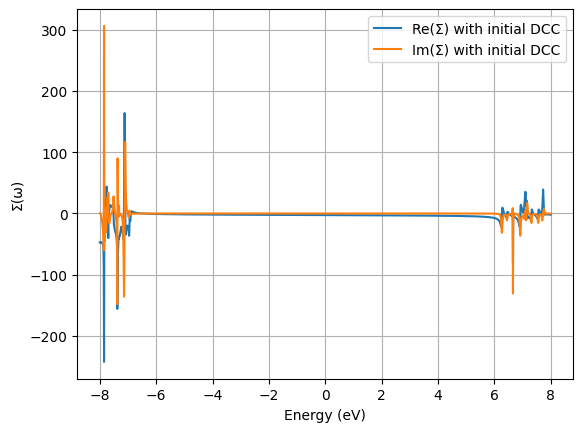

In [6]:
ed_self_energy_initial_dcc = np.load('output/lowdin/ed/ed_sigma_initial.npy')
trace_ed_self_energy_initial_dcc = np.trace(ed_self_energy_initial_dcc, axis1=1, axis2=2)
plt.plot(energies,trace_ed_self_energy_initial_dcc.real, label='Re(Σ) with initial DCC')
plt.plot(energies, trace_ed_self_energy_initial_dcc.imag, label='Im(Σ) with initial DCC')
plt.xlabel('Energy (eV)')
plt.ylabel('Σ(ω)')
plt.legend()
plt.grid()
# plt.xlim(-3,3)
# plt.ylim(-5,5)
plt.show()

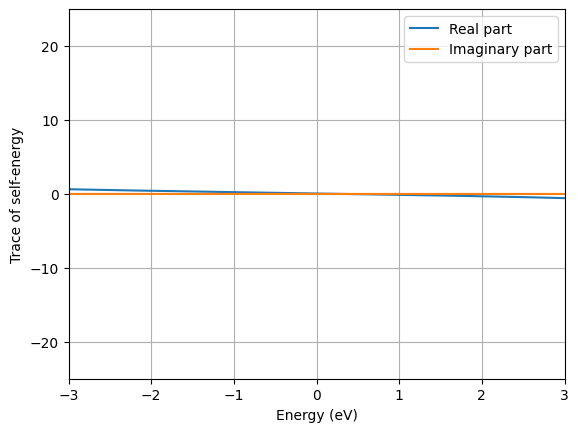

In [10]:
ed_self_energy = np.load('output/lowdin/ed/self_energy_with_dcc.npy')

trace_ed_se = np.trace(ed_self_energy, axis1=1, axis2=2)
plt.plot(energies, trace_ed_se.real, label='Real part')
plt.plot(energies, trace_ed_se.imag, label='Imaginary part')
plt.xlabel("Energy (eV)")
plt.ylabel("Trace of self-energy")
plt.legend()
plt.xlim(-3,3)
plt.ylim(-25,25)
plt.grid()

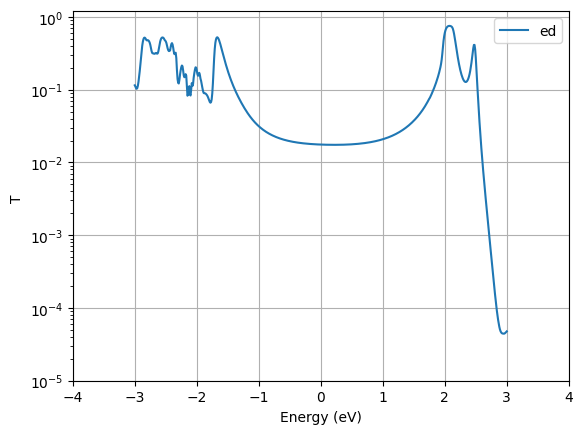

In [ ]:
E,T = np.load('output/lowdin/ed/ET.npy')
plt.plot(E, T, label='ed')
plt.xlabel('Energy (eV)')
plt.ylabel('T ')
plt.legend()
plt.yscale('log')
plt.xlim(-3,3)
plt.ylim(1e-5, 1.2)

plt.grid()